<a href="https://colab.research.google.com/github/CYBORG670/DenmarkR-VARS-VECM-/blob/main/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import openpyxl
from sklearn import tree
import os

In [ ]:
from google.colab import files

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
credit_card_data = pd.read_excel("/content/drive/MyDrive/ML/Credit_card.xlsx")
credit_card_labels = pd.read_excel("/content/drive/MyDrive/ML/Credit_card_label.xlsx")
result_df = pd.merge(credit_card_data,credit_card_labels,on='Ind_ID',how='inner')

In [ ]:
result_df.head(20)

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
5,5009753,NaN,Y,N,0,315000.0,Pensioner,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
6,5009754,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
7,5009894,F,N,N,0,180000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-22134.0,365243,1,0,0,0,NaN,2,1
8,5010864,M,Y,Y,1,450000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-18173.0,-678,1,0,1,1,Core staff,3,1
9,5010868,M,Y,Y,1,450000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-18173.0,-678,1,0,1,1,Core staff,3,1


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

In [ ]:
def encode_and_impute_columns(df):

  df_encoded = df.copy()
  le = LabelEncoder()
  imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

    # Loop through each column to encode or impute
  for column in df_encoded.columns:
      if df_encoded[column].dtype == 'object':
          # Fill NaN with the string 'Missing' before label encoding
          df_encoded[column] = df_encoded[column].fillna('Missing')
          # Transform the non-numeric columns to numeric labels
          df_encoded[column] = le.fit_transform(df_encoded[column])
      else:
          # Apply imputation for numerical columns with NaN values
          df_encoded[column] = imputer.fit_transform(df_encoded[[column]])

  return df_encoded

In [ ]:
result_df_encoded = encode_and_impute_columns(result_df)
result_df_encoded.head(10)

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827.0,1,1,1,0.0,180000.00000,1,1,1,1,-18772.000000,365243.0,1.0,0.0,0.0,0.0,12,2.0,1.0
1,5009744.0,0,1,0,0.0,315000.00000,0,1,1,1,-13557.000000,-586.0,1.0,1.0,1.0,0.0,12,2.0,1.0
2,5009746.0,0,1,0,0.0,315000.00000,0,1,1,1,-16040.342071,-586.0,1.0,1.0,1.0,0.0,12,2.0,1.0
3,5009749.0,0,1,0,0.0,191399.32623,0,1,1,1,-13557.000000,-586.0,1.0,1.0,1.0,0.0,12,2.0,1.0
4,5009752.0,0,1,0,0.0,315000.00000,0,1,1,1,-13557.000000,-586.0,1.0,1.0,1.0,0.0,12,2.0,1.0
5,5009753.0,2,1,0,0.0,315000.00000,1,1,1,1,-13557.000000,-586.0,1.0,1.0,1.0,0.0,12,2.0,1.0
6,5009754.0,0,1,0,0.0,315000.00000,0,1,1,1,-13557.000000,-586.0,1.0,1.0,1.0,0.0,12,2.0,1.0
7,5009894.0,0,0,0,0.0,180000.00000,1,4,1,1,-22134.000000,365243.0,1.0,0.0,0.0,0.0,12,2.0,1.0
8,5010864.0,1,1,1,1.0,450000.00000,0,4,1,1,-18173.000000,-678.0,1.0,0.0,1.0,1.0,3,3.0,1.0
9,5010868.0,1,1,1,1.0,450000.00000,1,4,1,1,-18173.000000,-678.0,1.0,0.0,1.0,1.0,3,3.0,1.0


In [ ]:
correlation_matrix = result_df_encoded.corr()
correlation_matrix
# Get the correlation of all features with the target variable 'label'
correlation_with_label = correlation_matrix['label'].sort_values(ascending=False)

correlation_with_label

label              1.000000
GENDER             0.079374
Marital_status     0.057885
Employed_days      0.031408
Annual_income      0.026875
Ind_ID             0.016796
EMAIL_ID           0.012921
Phone             -0.000664
Housing_type      -0.001610
Work_Phone        -0.007046
Type_Occupation   -0.008520
Car_Owner         -0.014734
Propert_Owner     -0.017906
CHILDREN          -0.021646
EDUCATION         -0.027040
Family_Members    -0.030709
Birthday_count    -0.044831
Type_Income       -0.067856
Mobile_phone            NaN
Name: label, dtype: float64

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,1,1,1,0,Drivers,2
1547,5053790,F,Y,Y,0,225000.0,Working,Higher education,Married,House / apartment,-16601.0,-2859,1,0,0,0,NaN,2


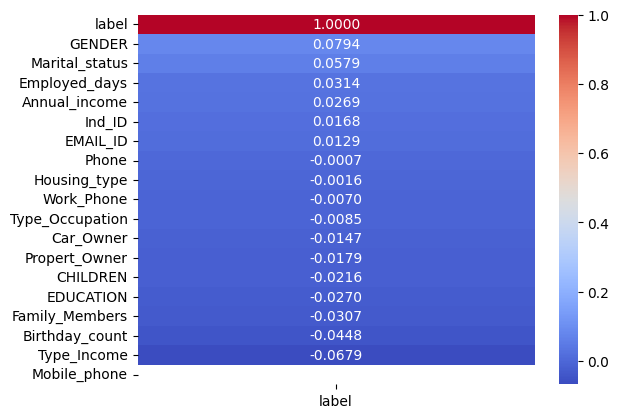

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt

#Ploting the entire correlation dataframe
#sn.heatmap(correlation_matrix,annot=True, cmap='coolwarm', fmt=".4f")

#Ploting the correlation_with_label
sn.heatmap(correlation_with_label.to_frame(),annot=True, cmap='coolwarm', fmt=".4f")

plt.show

#Print the 1st line of credit_card_data, to eyeball each feature value.
credit_card_data.tail(2)

# Split 60% of data for train and 40% of data for Test

In [ ]:
spuriousCorrelations = ['Ind_ID','Housing_type','Mobile_phone','Work_Phone','Phone','EMAIL_ID']

In [ ]:
from sklearn.model_selection import train_test_split

# Split result_df into two parts: 80% in trainDf and 20% in testDf
# Splitιng data into features and target
X = result_df_encoded.drop('label', axis=1)  # all columns except 'label'
y = result_df_encoded['label']  # the target column

# Spliting the dataset into training and testing sets
#random_stateint, RandomState instance or None, default=None
#Controls the shuffling applied to the data before applying the split. Pass an int for reproducible output across multiple function calls.
trainX, testX, trainY, testY = train_test_split(X, y, test_size=0.2, random_state=42)

#testDf, trainDf = train_test_split(result_df_encoded, test_size=0.6, random_state=42)
print("trainDf size:",trainX.shape[0],"trainDf=",trainX.shape[0]/result_df.shape[0],"%")
print("testDf size:",testX.shape[0],"testDf=",testX.shape[0]/result_df.shape[0],"%")
trainX.head()

trainDf size: 1238 trainDf= 0.7997416020671835 %
testDf size: 310 testDf= 0.20025839793281655 %


,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
680,5045113.0,0,0,1,0.0,202500.0,1,4,4,1,-21126.000000,365243.0,1.0,0.0,0.0,0.0,12,1.0
1079,5142781.0,1,1,0,2.0,157500.0,3,4,2,5,-13979.000000,-1626.0,1.0,0.0,0.0,0.0,8,3.0
1190,5113711.0,0,1,1,1.0,405000.0,2,4,1,1,-16962.000000,-407.0,1.0,0.0,1.0,1.0,8,3.0
864,5069117.0,0,0,1,0.0,180000.0,1,4,3,1,-20577.000000,365243.0,1.0,0.0,0.0,0.0,12,1.0
743,5117561.0,0,0,0,0.0,135000.0,3,4,1,1,-16040.342071,-645.0,1.0,1.0,0.0,0.0,8,2.0


# Fit DecisionTreeClassifier of Spurious Data with train data to train the Model

In [ ]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(trainX,trainY)

# Calculation of feature importances for Decision tree classifier including Spurious Correlations

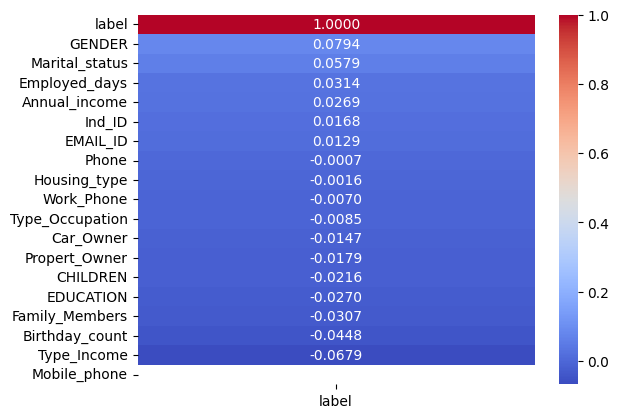

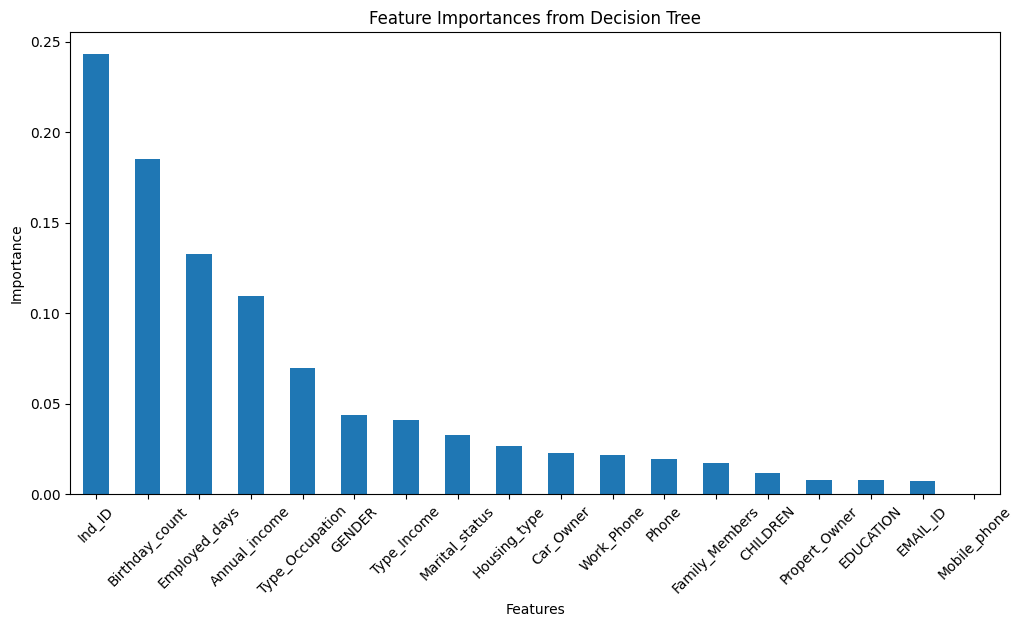

In [ ]:
# Get feature importances
feature_importances = clf.feature_importances_

# Create a pandas series with the feature importances
importances = pd.Series(feature_importances, index=trainX.columns).sort_values(ascending=False)

#Show correlation plot to eyeball with feature_importances
sn.heatmap(correlation_with_label.to_frame(),annot=True, cmap='coolwarm', fmt=".4f")
plt.show

#plot feature_importances
plt.figure(figsize=(12, 6))  # Increase figure size
importances.plot(kind='bar')
plt.title('Feature Importances from Decision Tree')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.xticks(rotation=45)  # Rotate the feature names
plt.show()  # Display the plot

# Excluding Spurious Correlations and perform recalculation

In [ ]:
result_df_encoded_filtered = result_df_encoded.drop(spuriousCorrelations, axis=1)

# Split result_df into two parts: 80% in trainDf and 20% in testDf
# Splitιng data into features and target
X_filtered = result_df_encoded_filtered.drop('label', axis=1)  # all columns except 'label'
y_filtered = result_df_encoded_filtered['label']  # the target column

# Spliting the dataset into training and testing sets
#random_stateint, RandomState instance or None, default=None
#Controls the shuffling applied to the data before applying the split. Pass an int for reproducible output across multiple function calls.
trainX_filtered, testX_filtered, trainY_filtered, testY_filtered = train_test_split(X_filtered, y_filtered, test_size=0.2, random_state=42)

#testDf, trainDf = train_test_split(result_df_encoded, test_size=0.6, random_state=42)
print("trainDf size:",trainX_filtered.shape[0],"trainDf=",trainX_filtered.shape[0]/result_df_encoded_filtered.shape[0],"%")
print("testDf size:",testX_filtered.shape[0],"testDf=",testX_filtered.shape[0]/result_df_encoded_filtered.shape[0],"%")
trainX_filtered.head()

trainDf size: 1238 trainDf= 0.7997416020671835 %
testDf size: 310 testDf= 0.20025839793281655 %


,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Birthday_count,Employed_days,Type_Occupation,Family_Members
680,0,0,1,0.0,202500.0,1,4,4,-21126.000000,365243.0,12,1.0
1079,1,1,0,2.0,157500.0,3,4,2,-13979.000000,-1626.0,8,3.0
1190,0,1,1,1.0,405000.0,2,4,1,-16962.000000,-407.0,8,3.0
864,0,0,1,0.0,180000.0,1,4,3,-20577.000000,365243.0,12,1.0
743,0,0,0,0.0,135000.0,3,4,1,-16040.342071,-645.0,8,2.0


# Fit DecisionTreeClassifier of Filtered Data with train data to train the Model

In [ ]:
clf_2 = tree.DecisionTreeClassifier()
clf_filtered = clf_2.fit(trainX_filtered,trainY_filtered)

# Displaying Spurious Data Decision tree using graphviz

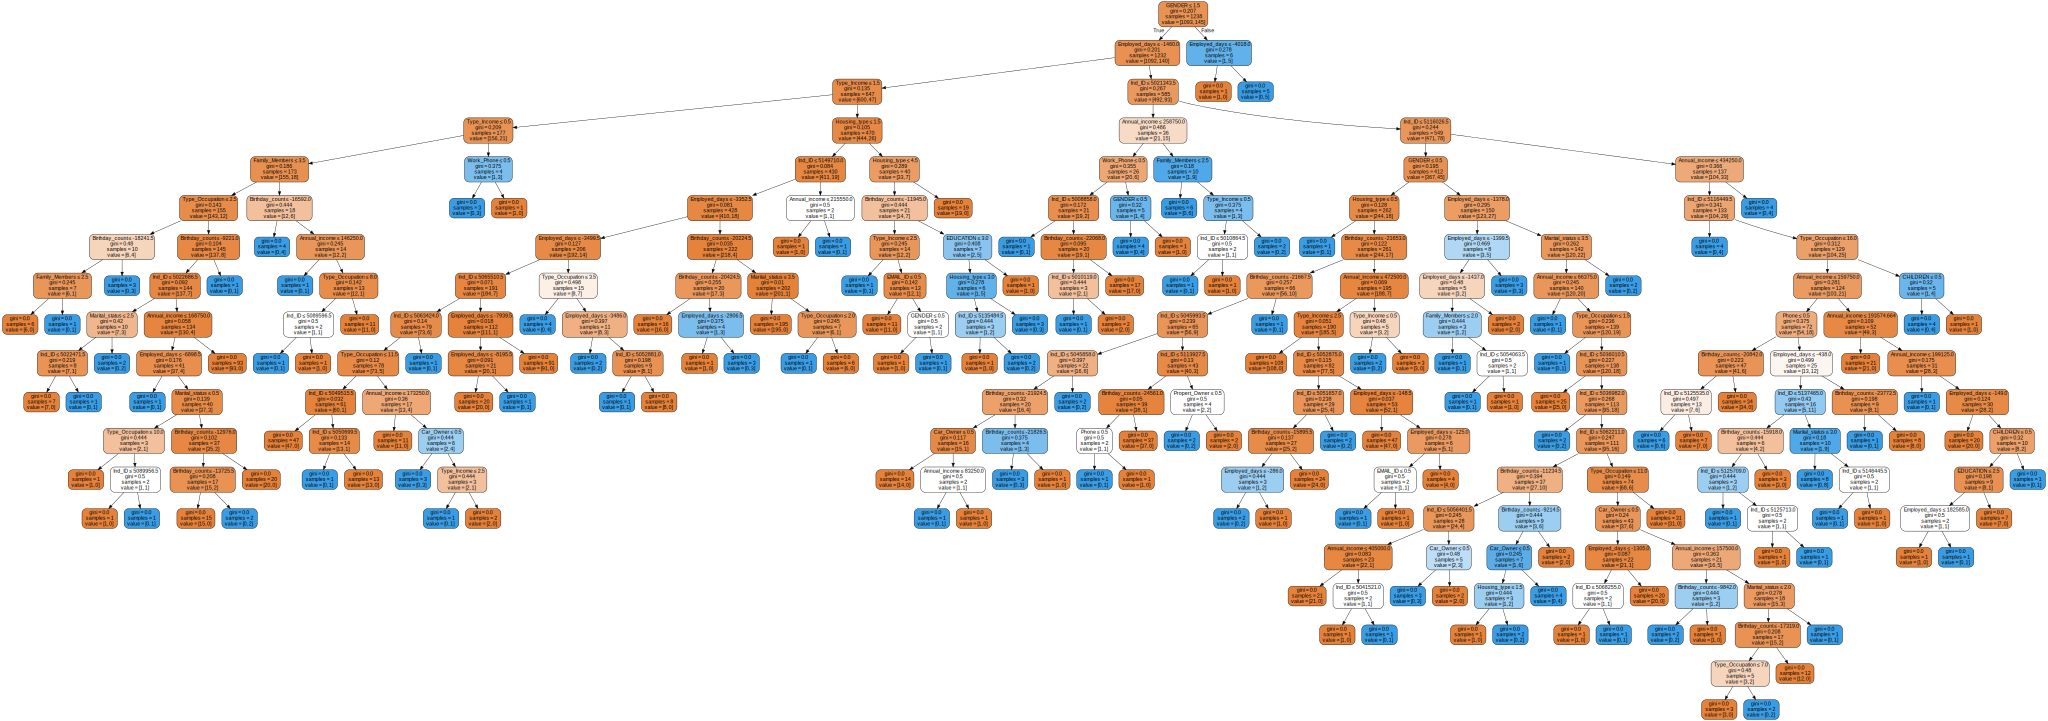

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

features = list(testX)
# Export the decision tree to a dot file
dot_data = export_graphviz(clf, out_file=None,
                           feature_names=features,
                           filled=True, rounded=True,
                           special_characters=True)

# Use graphviz to render the dot data as a graph
graph = graphviz.Source(dot_data)
graph

# Displaying Filtered Data Decision tree using graphviz

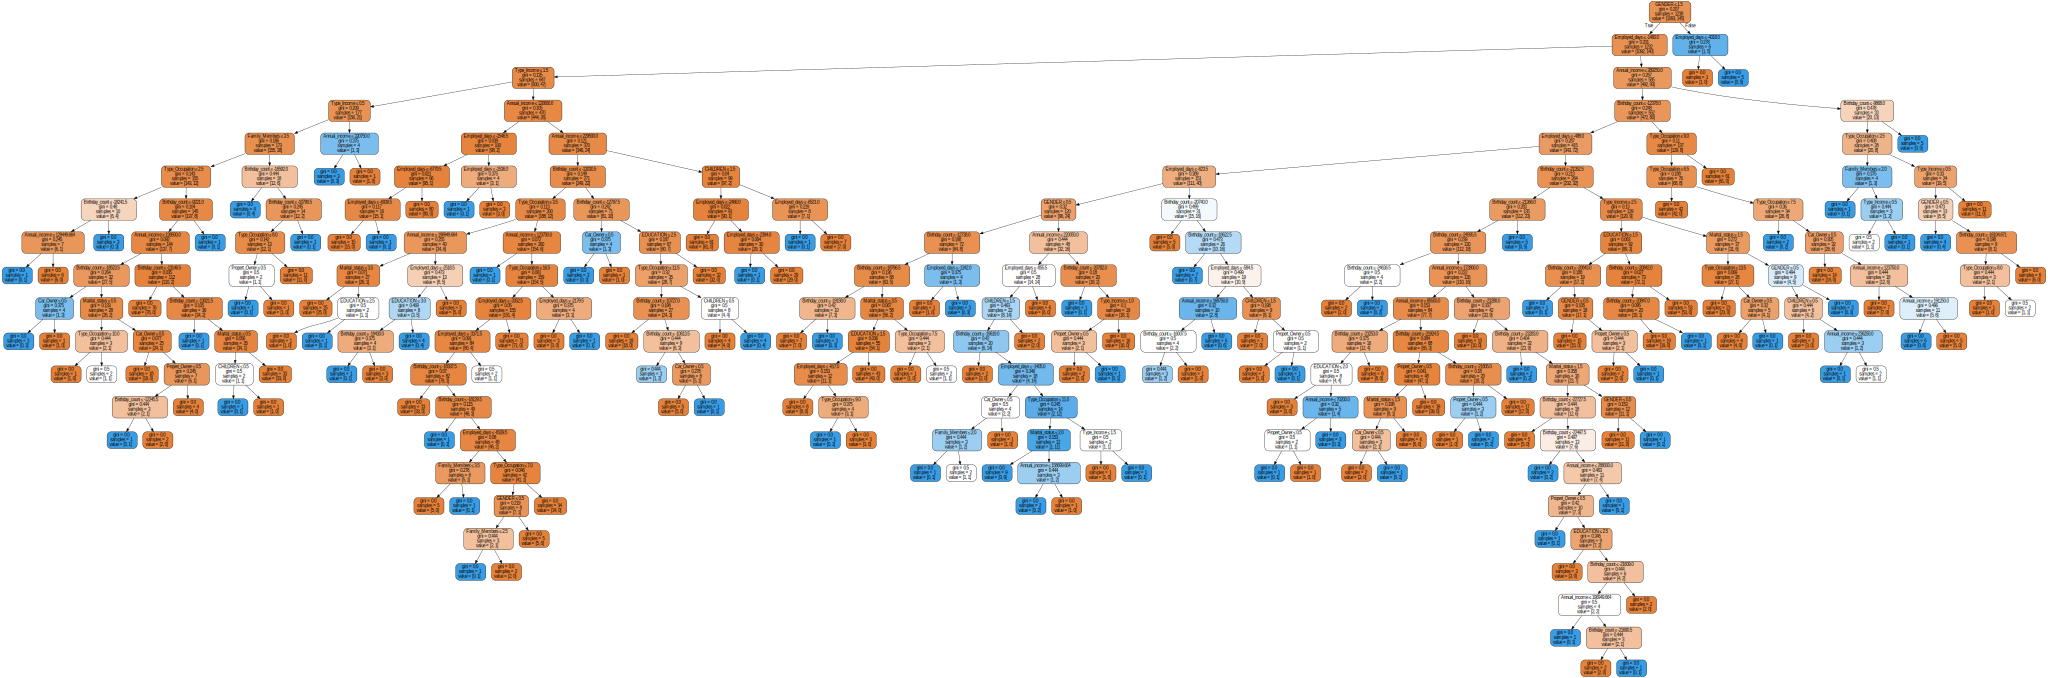

In [ ]:
features_filtered = list(testX_filtered)
# Export the decision tree to a dot file
dot_data = export_graphviz(clf_filtered, out_file=None,
                           feature_names=features_filtered,
                           filled=True, rounded=True,
                           special_characters=True)

# Use graphviz to render the dot data as a graph
graph = graphviz.Source(dot_data)
graph

Lets check a specific test prediction for spurious data model

In [ ]:
print("testX - input \n",testX.iloc[0])
print("\ntestY - expected result\n",testY.iloc[0])
result_df_encoded[result_df_encoded['Ind_ID'] == testX.iloc[0]["Ind_ID"]].head()
test_prediction = clf.predict(testX.iloc[[0]])
print("\ntest_prediction\n",test_prediction)

testX - input 
 Ind_ID             5029028.0
GENDER                   0.0
Car_Owner                0.0
Propert_Owner            1.0
CHILDREN                 0.0
Annual_income        90000.0
Type_Income              3.0
EDUCATION                3.0
Marital_status           3.0
Housing_type             4.0
Birthday_count      -12026.0
Employed_days        -4770.0
Mobile_phone             1.0
Work_Phone               0.0
Phone                    0.0
EMAIL_ID                 0.0
Type_Occupation          1.0
Family_Members           2.0
Name: 30, dtype: float64

testY - expected result
 1.0

test_prediction
 [0.]


In [ ]:
print("testX_filtered - input \n",testX_filtered.tail(1))
print("\ntestY_filtered - expected result\n",testY_filtered.tail(1))
result_df_encoded_filtered.iloc[[874]]
test_prediction_filtered = clf_filtered.predict(testX_filtered.iloc[[0]])
print("\ntest_prediction_filtered\n",test_prediction_filtered)

testX_filtered - input 
      GENDER  Car_Owner  Propert_Owner  CHILDREN  Annual_income  Type_Income  \
874       0          0              1       0.0       157500.0            3   

     EDUCATION  Marital_status  Birthday_count  Employed_days  \
874          4               1        -15035.0        -1128.0   

     Type_Occupation  Family_Members  
874                1             2.0  

testY_filtered - expected result
 874    0.0
Name: label, dtype: float64

test_prediction_filtered
 [0.]


# precision_score AND accuracy_score with spurious data

In [ ]:
from sklearn.metrics import precision_score, accuracy_score

# Use the trained classifier to make predictions on the test set
test_predictions = clf.predict(testX)

# Calculate the precision of the predictions
precision = precision_score(testY, test_predictions, average='macro')  # 'macro' average is one of the options

# Calculate the accuracy of the predictions
accuracy = accuracy_score(testY, test_predictions)

# Print the precision and accuracy
print(f"Precision: {precision}")
print(f"Accuracy: {accuracy}")

Precision: 0.6831535043974974
Accuracy: 0.8806451612903226


# precision_score AND accuracy_score with filtered data

In [ ]:
from sklearn.metrics import precision_score, accuracy_score

# Use the trained classifier to make predictions on the test set
test_predictions_filtered = clf_filtered.predict(testX_filtered)

# Calculate the precision of the predictions
precision_filtered = precision_score(testY_filtered, test_predictions_filtered, average='macro')  # 'macro' average is one of the options

# Calculate the accuracy of the predictions
accuracy_filtered = accuracy_score(testY_filtered, test_predictions_filtered)

# Print the precision and accuracy
print(f"Precision_filtered: {precision_filtered}")
print(f"Accuracy_filtered: {accuracy_filtered}")

Precision_filtered: 0.6438618925831202
Accuracy_filtered: 0.8709677419354839
